# Project Description

My name is Mohammad Abdus Samad. I am working as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

I have to carry out a primary analysis of the plans based on a relatively small client selection. I have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.
### Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For **calls**, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For **web traffic**, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

### Surf
1. Monthly charge: 20 dollars
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
  - 1 minute: 3 cents
  - 1 text message: 3 cents
  - 1 GB of data: 10 dollars
  
### Ultimate
1. Monthly charge: 70 dollars
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
  - 1 minute: 1 cent
  - 1 text message: 1 cent
  - 1 GB of data: 7 dollars
  
### Description of the data
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**The users table (data on users):**
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
- city — user's city of residence
- plan — calling plan name

**The calls table (data on calls):**
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call

**The messages table (data on texts):**
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text

**The internet table (data on web sessions):**
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

**The plans table (data on the plans):**
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

# Project Goal

 Analyzing clients' behavior and determine which prepaid plan brings in more revenue.

# Project Content:

-  <a href='#the_destination1'>Open the data file and study the general information</a>
-  <a href='#the_destination2'>Prepare the data</a>
-  <a href='#the_destination3'>Analyse the data</a>
-  <a href='#the_destination4'>Testing hypotheses</a>
-  <a href='#the_destination5'>Overall Conclusion</a>

<a id='the_destination1'></a>
# Step 1. Open the data file and study the general information. 

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

**Information for the "megaline_calls" table:**

In [2]:
try:
    megaline_calls = pd.read_csv('megaline_calls.csv')
except:
    megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In the "megaline_calls" table, there are 137735 rows & 4 columns named "id", "user_id", "call_date", "duration".

**Information for the "megaline_internet" table:**

In [3]:
try:
    megaline_internet = pd.read_csv('megaline_internet.csv')
except:
    megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In the "megaline_internet" table, there are 104825 rows & 4 columns named "id", "user_id", "session_date", "mb_used".

**Information for the "megaline_messages" table:**

In [4]:
try:
    megaline_messages = pd.read_csv('megaline_messages.csv')
except:
    megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In the "megaline_messages" table, there are 76051 rows & 3 columns named "id", "user_id", "message_date".

**Information for the "megaline_plans" table:**

In [5]:
try:
    megaline_plans = pd.read_csv('megaline_plans.csv')
except:
    megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In the "megaline_plans" table, there are 2 rows & 8 columns named "messages_included","mb_per_month_included" , "minutes_included", "usd_monthly_pay", "usd_per_gb", "usd_per_message", "usd_per_minute", "plan_name".

**Information for the "megaline_users" data:**

In [6]:
try:
    megaline_users = pd.read_csv('megaline_users.csv')
except:
    megaline_users = pd.read_csv('/datasets/megaline_users.csv')
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In the "megaline_users" table, there are 500 rows & 8 columns named "user_id", "first_name", "last_name", "age", "city", "reg_date", "plan", "churn_date".

<a id='the_destination2'></a>
# Step 2. Prepare the data

**Checking missing values for "megaline_calls" table:**

In [7]:
megaline_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

There are no missing values in the "megaline_calls" dataset.

**Checking missing values for "megaline_internet" table:**

In [8]:
megaline_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

There are no missing values in the "megaline_internet" dataset.

**Checking missing values for "megaline_messages" table:**

In [9]:
megaline_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

There are no missing values in the "megaline_messages" dataset.

**Checking missing values for "megaline_plans" table:**

In [10]:
megaline_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

There are no missing values in the "megaline_plans" dataset.

**Checking missing values for "megaline_users" table:**

In [11]:
megaline_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In the  "megaline_users" table "churn_date" column has 466 missing values.

**In "megaline_users" table filling "churn_date" column:** 

In [12]:
megaline_users['churn_date'] = megaline_users['churn_date'].fillna("31-12-2018")
display(megaline_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,31-12-2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,31-12-2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,31-12-2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,31-12-2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,31-12-2018


In the  "megaline_users" table "churn_date" column has 466 missing values.I filled those missing values with "31-12-2018" because the telecom operator Megaline wants to know the data for 2018.That's why I filled "churn_date" column till end of 2018.

**Percentage of missing values for each category**

In [13]:
 (megaline_users.isnull().sum() * 100) / len(megaline_users)

user_id       0.0
first_name    0.0
last_name     0.0
age           0.0
city          0.0
reg_date      0.0
plan          0.0
churn_date    0.0
dtype: float64

**Converting from string to datetime format:**

In [14]:
megaline_users['churn_date'] = megaline_users['churn_date'].astype('datetime64[ns]')
megaline_users['reg_date'] = megaline_users['reg_date'].astype('datetime64[ns]')
megaline_calls['call_date'] = megaline_calls['call_date'].astype('datetime64[ns]')
megaline_messages['message_date'] = megaline_messages['message_date'].astype('datetime64[ns]')
megaline_internet['session_date'] = megaline_internet['session_date'].astype('datetime64[ns]')

After observation, I found "churn_date", "reg_date", "call_date", "message_date", "session_date" columns were string type. I converted it from srting type to date type format.

**In "megaline_calls" table, converting "duration" column from float type to integer type:**

In [15]:
megaline_calls["duration"] = megaline_calls["duration"].apply(np.ceil)
display(megaline_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In "megaline_calls" table, I converted the "duration" column data type from float type to integer type.According to the question, For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 

**Checking duplicates:**

In [16]:
print(megaline_calls.duplicated().sum())
print(megaline_users.duplicated().sum())
print(megaline_messages.duplicated().sum())
print(megaline_plans.duplicated().sum())
print(megaline_internet.duplicated().sum())


0
0
0
0
0


There are no duplicates in all of the datasets.

**Checking value_counts in the "megaline_internet" dataset "mb_used" column:**

In [17]:
megaline_internet["mb_used"].value_counts()

0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64

In the "megaline_internet" dataset "mb_used" column, there are 13747 rows have zero values. This means that 13747 clients did not use internet. 

**Checking value_counts in the "megaline_calls" dataset "duration" column:**

In [18]:
megaline_calls["duration"].value_counts()

0.0     26834
6.0      7848
5.0      7778
7.0      7769
8.0      7718
4.0      7434
9.0      7357
3.0      6942
10.0     6918
2.0      6446
11.0     6407
1.0      5795
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
36.0        3
34.0        2
38.0        1
37.0        1
Name: duration, dtype: int64

In the "megaline_calls" dataset "duration" column, there are 26834 rows have zero values. This means that 26834 clients did not use number of minutes. 

**Merging "megaline_users" & "megaline_calls" dataset:**

In [19]:
merging_users_calls = megaline_users[['user_id','plan','reg_date','churn_date']].merge(megaline_calls[['id','user_id','call_date']],on='user_id',how='left')
merging_users_calls.head()

,user_id,plan,reg_date,churn_date,id,call_date
0,1000,ultimate,2018-12-24,2018-12-31,1000_93,2018-12-27
1,1000,ultimate,2018-12-24,2018-12-31,1000_145,2018-12-27
2,1000,ultimate,2018-12-24,2018-12-31,1000_247,2018-12-27
3,1000,ultimate,2018-12-24,2018-12-31,1000_309,2018-12-28
4,1000,ultimate,2018-12-24,2018-12-31,1000_380,2018-12-30


**Checking calls before the date of registration:**

In [20]:
merging_users_calls[merging_users_calls.call_date < merging_users_calls.reg_date] 

,user_id,plan,reg_date,churn_date,id,call_date


**Checking calls after cancelling the registration:**

In [21]:
display(merging_users_calls[merging_users_calls.call_date > merging_users_calls.churn_date])

,user_id,plan,reg_date,churn_date,id,call_date
973,1006,ultimate,2018-11-27,2018-12-18,1006_50,2018-12-21
976,1006,ultimate,2018-11-27,2018-12-18,1006_74,2018-12-26
3561,1012,surf,2018-06-28,2018-11-16,1012_1,2018-12-19
3562,1012,surf,2018-06-28,2018-11-16,1012_2,2018-12-23
3563,1012,surf,2018-06-28,2018-11-16,1012_3,2018-12-07
...,...,...,...,...,...,...
135687,1491,surf,2018-04-27,2018-09-18,1491_639,2018-11-26
135689,1491,surf,2018-04-27,2018-09-18,1491_641,2018-12-14
135690,1491,surf,2018-04-27,2018-09-18,1491_642,2018-10-08
135691,1491,surf,2018-04-27,2018-09-18,1491_644,2018-11-29


**Checking calls between "reg_date" & "churn_date":**

In [22]:
filtered_merging_users_calls = merging_users_calls.query('call_date <= churn_date ')
filtered_merging_users_calls.head()

,user_id,plan,reg_date,churn_date,id,call_date
0,1000,ultimate,2018-12-24,2018-12-31,1000_93,2018-12-27
1,1000,ultimate,2018-12-24,2018-12-31,1000_145,2018-12-27
2,1000,ultimate,2018-12-24,2018-12-31,1000_247,2018-12-27
3,1000,ultimate,2018-12-24,2018-12-31,1000_309,2018-12-28
4,1000,ultimate,2018-12-24,2018-12-31,1000_380,2018-12-30


**Merging "megaline_users" & "megaline_messages" dataset:**

In [23]:
merging_users_messages = megaline_users[['user_id','plan','reg_date','churn_date']].merge(megaline_messages[['id','user_id','message_date']],on='user_id',how='left')
merging_users_messages.head()

,user_id,plan,reg_date,churn_date,id,message_date
0,1000,ultimate,2018-12-24,2018-12-31,1000_125,2018-12-27
1,1000,ultimate,2018-12-24,2018-12-31,1000_160,2018-12-31
2,1000,ultimate,2018-12-24,2018-12-31,1000_223,2018-12-31
3,1000,ultimate,2018-12-24,2018-12-31,1000_251,2018-12-27
4,1000,ultimate,2018-12-24,2018-12-31,1000_255,2018-12-26


**Checking messages before the date of registration:**

In [24]:
merging_users_messages[merging_users_messages.message_date < merging_users_messages.reg_date] 

,user_id,plan,reg_date,churn_date,id,message_date


**Checking messages after cancelling the registration:**

In [25]:
display(merging_users_messages[merging_users_messages.message_date > merging_users_messages.churn_date]) 

,user_id,plan,reg_date,churn_date,id,message_date
544,1006,ultimate,2018-11-27,2018-12-18,1006_2,2018-12-25
547,1006,ultimate,2018-11-27,2018-12-18,1006_12,2018-12-20
548,1006,ultimate,2018-11-27,2018-12-18,1006_14,2018-12-29
549,1006,ultimate,2018-11-27,2018-12-18,1006_15,2018-12-20
552,1006,ultimate,2018-11-27,2018-12-18,1006_30,2018-12-23
...,...,...,...,...,...,...
75735,1491,surf,2018-04-27,2018-09-18,1491_578,2018-11-04
75742,1491,surf,2018-04-27,2018-09-18,1491_589,2018-11-20
75744,1491,surf,2018-04-27,2018-09-18,1491_591,2018-11-27
75746,1491,surf,2018-04-27,2018-09-18,1491_597,2018-10-17


**Checking mesagess between "reg_date" & "churn_date":**

In [26]:
filtered_merging_users_messages = merging_users_messages.query('message_date <= churn_date ')
filtered_merging_users_messages.head()

,user_id,plan,reg_date,churn_date,id,message_date
0,1000,ultimate,2018-12-24,2018-12-31,1000_125,2018-12-27
1,1000,ultimate,2018-12-24,2018-12-31,1000_160,2018-12-31
2,1000,ultimate,2018-12-24,2018-12-31,1000_223,2018-12-31
3,1000,ultimate,2018-12-24,2018-12-31,1000_251,2018-12-27
4,1000,ultimate,2018-12-24,2018-12-31,1000_255,2018-12-26


**Merging "megaline_users" & "megaline_internet" dataset:**

In [27]:
merging_users_internet = megaline_users[['user_id','plan','reg_date','churn_date']].merge(megaline_internet[['id','user_id','session_date']],on='user_id',how='left')
merging_users_internet.head()

,user_id,plan,reg_date,churn_date,id,session_date
0,1000,ultimate,2018-12-24,2018-12-31,1000_13,2018-12-29
1,1000,ultimate,2018-12-24,2018-12-31,1000_204,2018-12-31
2,1000,ultimate,2018-12-24,2018-12-31,1000_379,2018-12-28
3,1000,ultimate,2018-12-24,2018-12-31,1000_413,2018-12-26
4,1000,ultimate,2018-12-24,2018-12-31,1000_442,2018-12-27


**Checking internet user before the date of registration:**

In [28]:
merging_users_internet[merging_users_internet.session_date < merging_users_internet.reg_date] 

,user_id,plan,reg_date,churn_date,id,session_date


**Checking internet user after cancelling the registration:**

In [29]:
display(merging_users_internet[merging_users_internet.session_date > merging_users_internet.churn_date]) 

,user_id,plan,reg_date,churn_date,id,session_date
948,1006,ultimate,2018-11-27,2018-12-18,1006_14,2018-12-24
954,1006,ultimate,2018-11-27,2018-12-18,1006_25,2018-12-22
955,1006,ultimate,2018-11-27,2018-12-18,1006_26,2018-12-25
956,1006,ultimate,2018-11-27,2018-12-18,1006_31,2018-12-24
957,1006,ultimate,2018-11-27,2018-12-18,1006_49,2018-12-25
...,...,...,...,...,...,...
102763,1491,surf,2018-04-27,2018-09-18,1491_247,2018-10-30
102764,1491,surf,2018-04-27,2018-09-18,1491_249,2018-11-28
102766,1491,surf,2018-04-27,2018-09-18,1491_251,2018-12-24
102772,1491,surf,2018-04-27,2018-09-18,1491_262,2018-11-11


**Checking internet user between "reg_date" & "churn_date":**

In [30]:
filtered_merging_users_internet = merging_users_internet.query('session_date <= churn_date ')
filtered_merging_users_internet.head()

,user_id,plan,reg_date,churn_date,id,session_date
0,1000,ultimate,2018-12-24,2018-12-31,1000_13,2018-12-29
1,1000,ultimate,2018-12-24,2018-12-31,1000_204,2018-12-31
2,1000,ultimate,2018-12-24,2018-12-31,1000_379,2018-12-28
3,1000,ultimate,2018-12-24,2018-12-31,1000_413,2018-12-26
4,1000,ultimate,2018-12-24,2018-12-31,1000_442,2018-12-27


**In the "megaline_users" dataset, subtracting from "churn_date" to "reg_date" and put the result in a new column named "day_of_use"**

In [31]:
megaline_users['day_of_use'] = ((megaline_users['churn_date'] - megaline_users['reg_date']).dt.days).apply(np.ceil)
display(megaline_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,day_of_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,7.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,140.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,71.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,337.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,222.0


**Deleting the column "churn_date" & creating a new more useful column named "day_of_use"**

In [32]:
del megaline_users["churn_date"]
display(megaline_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,day_of_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,7.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,140.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,71.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,337.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,222.0


**In the "megaline_calls" dataset,creating a new column named "call_month" and the number of calls made and minutes used per month**

In [33]:
megaline_calls['call_month'] = megaline_calls['call_date'].dt.month
display(megaline_calls.head())
call_monthly = megaline_calls.groupby(['user_id' ]).agg({"call_month": "count",'duration':"sum"}).reset_index()
display(call_monthly.head())

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


,user_id,call_month,duration
0,1000,16,124.0
1,1001,261,1728.0
2,1002,113,829.0
3,1003,149,1104.0
4,1004,370,2772.0


**In the "megaline_internet" dataset, creating a new column named "session_month", transferring megabytes to gigabytes and volume usage:**

In [34]:
megaline_internet['session_month'] = megaline_internet['session_date'].dt.month_name()
display(megaline_internet.head())
megaline_internet['mb_used']= megaline_internet['mb_used'] / 1024
data_group = megaline_internet.groupby(['user_id']).agg({'session_month':'count', 'mb_used':"sum"}).reset_index()
data_group['mb_used'] = data_group['mb_used'].apply(np.ceil)
display(data_group.head())

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


,user_id,session_month,mb_used
0,1000,5,2.0
1,1001,245,79.0
2,1002,124,40.0
3,1003,52,27.0
4,1004,460,153.0


In the "megaline_internet" dataset "mb_used" column, I divided the "mb_used" column by 1024 for converting the result from megabytes to gigabytes and  according to the question, for "mb_used", each individual "mb_used" is rounded up: even if the "mb_used" lasted just one megabyte, it will be counted as gigabyte. 

**In the "megaline_messages" dataset, creating a new column named "message_month" & counting the number of text messages sent:**

In [35]:
megaline_messages['message_month'] = megaline_messages['message_date'].dt.month_name()
display(megaline_messages.head())
message_group =megaline_messages.groupby(['user_id']).agg({"message_month": "count"}).reset_index()
display(message_group.head())

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


,user_id,message_month
0,1000,11
1,1001,207
2,1002,88
3,1003,50
4,1004,177


**Merging between "call_monthly" and "data_group":**

In [36]:
merge_one = pd.merge(call_monthly ,data_group ,on=['user_id'],how ='outer')
display(merge_one.head())

,user_id,call_month,duration,session_month,mb_used
0,1000,16.0,124.0,5.0,2.0
1,1001,261.0,1728.0,245.0,79.0
2,1002,113.0,829.0,124.0,40.0
3,1003,149.0,1104.0,52.0,27.0
4,1004,370.0,2772.0,460.0,153.0


**Extracting plans for each user from megaline_users table:**

In [37]:
plan_group = megaline_users[["user_id", "plan","city"]]

**Merging between "message_group" & "plan_group":**

In [38]:
merge_two= pd.merge(message_group,plan_group,on=['user_id'],how ='outer')
display(merge_two.head())

,user_id,message_month,plan,city
0,1000,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,207.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,88.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,50.0,surf,"Tulsa, OK MSA"
4,1004,177.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


**Final merging & combing all of the tables**

In [39]:
final_merge = pd.merge(merge_one ,merge_two,on=['user_id'],how ='outer')
display(final_merge.head(10))

,user_id,call_month,duration,session_month,mb_used,message_month,plan,city
0,1000,16.0,124.0,5.0,2.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,261.0,1728.0,245.0,79.0,207.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,113.0,829.0,124.0,40.0,88.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,149.0,1104.0,52.0,27.0,50.0,surf,"Tulsa, OK MSA"
4,1004,370.0,2772.0,460.0,153.0,177.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1005,59.0,496.0,60.0,17.0,11.0,surf,"Dallas-Fort Worth-Arlington, TX MSA"
6,1006,11.0,69.0,70.0,34.0,154.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA"
7,1007,380.0,2641.0,273.0,141.0,255.0,surf,"Grand Rapids-Kentwood, MI MSA"
8,1008,219.0,1556.0,176.0,55.0,84.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA"
9,1009,856.0,5954.0,386.0,183.0,NaN,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA"


**Replacing nan by 0, combining columns & hide index:**

In [40]:
final_merge=final_merge.fillna(0)
final_merge = final_merge.rename(columns={"call_month": "Nb_of_calls", "duration": "Nb_of_min","mb_used":"Data_used_in_gb",'session_month':"Nb_of_data_sessions",'message_month':'Nb_of_messages_sent' })
final_merge.head(10).style.hide_index()

user_id,Nb_of_calls,Nb_of_min,Nb_of_data_sessions,Data_used_in_gb,Nb_of_messages_sent,plan,city
1000,16,124,5,2,11,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1001,261,1728,245,79,207,surf,"Seattle-Tacoma-Bellevue, WA MSA"
1002,113,829,124,40,88,surf,"Las Vegas-Henderson-Paradise, NV MSA"
1003,149,1104,52,27,50,surf,"Tulsa, OK MSA"
1004,370,2772,460,153,177,surf,"Seattle-Tacoma-Bellevue, WA MSA"
1005,59,496,60,17,11,surf,"Dallas-Fort Worth-Arlington, TX MSA"
1006,11,69,70,34,154,ultimate,"San Francisco-Oakland-Berkeley, CA MSA"
1007,380,2641,273,141,255,surf,"Grand Rapids-Kentwood, MI MSA"
1008,219,1556,176,55,84,ultimate,"Orlando-Kissimmee-Sanford, FL MSA"
1009,856,5954,386,183,0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA"


**Calculation of monthly revenue generated by each user:**

In [41]:
def calls_surplus(plan):
    if plan == "ultimate":
        return 3000
    elif plan == "surf":
        return 500

final_merge["surplus_calls"] = final_merge["plan"].map(calls_surplus) - final_merge["Nb_of_min"]

def messages_surplus(plan):
    if plan == "ultimate":
        return 1000
    elif plan == "surf":
        return 50
final_merge["messages_surplus"] = final_merge["plan"].map(messages_surplus) - final_merge['Nb_of_messages_sent']

def data_surplus(plan):
    if plan == "ultimate":
        return 30
    elif plan == "surf":
        return 15
final_merge["data_surplus"] = final_merge["plan"].map(data_surplus) - final_merge['Data_used_in_gb']

**Multipling the result by the calling plan value:**

In [42]:
def surplus_charge_calls(plan):
    if plan == "ultimate":
        return .01
    if plan == "surf":
        return .03
    
final_merge["surplus_charge_calls"] = final_merge["plan"].map(surplus_charge_calls) * final_merge['surplus_calls']

def surplus_charge_messages(plan):
    if plan == "ultimate":
        return .01
    if plan == "surf":
        return .03
    
final_merge["surplus_charge_messages"] = final_merge["plan"].map(surplus_charge_messages) * final_merge['messages_surplus']

def surplus_charge_data(plan):
    if plan == "ultimate":
        return 7
    if plan == "surf":
        return 10
final_merge["surplus_charge_data"] = final_merge["plan"].map(surplus_charge_data) * final_merge['data_surplus']

**Calculation of the total revenue:**

In [43]:
def revenue(plan):
    if plan == "ultimate":
        return 70
    elif plan == "surf":
        return 20

**Converting the negative values into positive for calculation purpose:**

In [44]:
final_merge['surplus_charge_data'] = final_merge['surplus_charge_data'].apply(lambda x: (x * -1) if x < 0 else x)  
final_merge['surplus_charge_calls'] = final_merge['surplus_charge_calls'].abs()
final_merge['surplus_charge_messages'] = final_merge['surplus_charge_messages'].abs()

In [45]:
final_merge.head()

,user_id,Nb_of_calls,Nb_of_min,Nb_of_data_sessions,Data_used_in_gb,Nb_of_messages_sent,plan,city,surplus_calls,messages_surplus,data_surplus,surplus_charge_calls,surplus_charge_messages,surplus_charge_data
0,1000,16.0,124.0,5.0,2.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",2876.0,989.0,28.0,28.76,9.89,196.0
1,1001,261.0,1728.0,245.0,79.0,207.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",-1228.0,-157.0,-64.0,36.84,4.71,640.0
2,1002,113.0,829.0,124.0,40.0,88.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",-329.0,-38.0,-25.0,9.87,1.14,250.0
3,1003,149.0,1104.0,52.0,27.0,50.0,surf,"Tulsa, OK MSA",-604.0,0.0,-12.0,18.12,0.00,120.0
4,1004,370.0,2772.0,460.0,153.0,177.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",-2272.0,-127.0,-138.0,68.16,3.81,1380.0


**Replacing the positive values of the surplus calls,messages,data columns by 0 as the user didn't do any outpackage consumption**

In [46]:
final_merge['surplus_charge_calls'] = final_merge['surplus_charge_calls'].mask(final_merge['surplus_charge_calls'] > 0, 0)       
final_merge['surplus_charge_messages'] = final_merge['surplus_charge_messages'].mask(final_merge['surplus_charge_messages'] > 0, 0)  
final_merge['surplus_charge_data'] = final_merge['surplus_charge_data'].mask(final_merge['surplus_charge_data'] > 0, 0)
final_merge.head()

,user_id,Nb_of_calls,Nb_of_min,Nb_of_data_sessions,Data_used_in_gb,Nb_of_messages_sent,plan,city,surplus_calls,messages_surplus,data_surplus,surplus_charge_calls,surplus_charge_messages,surplus_charge_data
0,1000,16.0,124.0,5.0,2.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",2876.0,989.0,28.0,0.0,0.0,0.0
1,1001,261.0,1728.0,245.0,79.0,207.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",-1228.0,-157.0,-64.0,0.0,0.0,0.0
2,1002,113.0,829.0,124.0,40.0,88.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",-329.0,-38.0,-25.0,0.0,0.0,0.0
3,1003,149.0,1104.0,52.0,27.0,50.0,surf,"Tulsa, OK MSA",-604.0,0.0,-12.0,0.0,0.0,0.0
4,1004,370.0,2772.0,460.0,153.0,177.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",-2272.0,-127.0,-138.0,0.0,0.0,0.0


**Adding monthly charge depending on the calling plan & surplus charges:**

In [47]:
final_merge["revenue"] = final_merge["plan"].map(revenue) + final_merge['surplus_charge_calls'] + final_merge['surplus_charge_messages'] + final_merge['surplus_charge_data']
mean_revenue = final_merge['revenue'].mean()
print("We have an average revenue of :",mean_revenue)
final_merge.head()

We have an average revenue of : 36.1


,user_id,Nb_of_calls,Nb_of_min,Nb_of_data_sessions,Data_used_in_gb,Nb_of_messages_sent,plan,city,surplus_calls,messages_surplus,data_surplus,surplus_charge_calls,surplus_charge_messages,surplus_charge_data,revenue
0,1000,16.0,124.0,5.0,2.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",2876.0,989.0,28.0,0.0,0.0,0.0,70.0
1,1001,261.0,1728.0,245.0,79.0,207.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",-1228.0,-157.0,-64.0,0.0,0.0,0.0,20.0
2,1002,113.0,829.0,124.0,40.0,88.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",-329.0,-38.0,-25.0,0.0,0.0,0.0,20.0
3,1003,149.0,1104.0,52.0,27.0,50.0,surf,"Tulsa, OK MSA",-604.0,0.0,-12.0,0.0,0.0,0.0,20.0
4,1004,370.0,2772.0,460.0,153.0,177.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",-2272.0,-127.0,-138.0,0.0,0.0,0.0,20.0


Conclusion for the data preprocessing:

-  In the  "megaline_users" table "churn_date" column has 466 missing values.I filled those missing values with "31-12-2018" because the telecom operator Megaline wants to know the data for 2018.That's why I filled "churn_date" column till end of 2018.
-  After observation, I found "churn_date", "reg_date", "call_date", "message_date", "session_date" columns were string type. I converted it from srting type to date type format.
-  In "megaline_calls" table, I converted the "duration" column data type from float type to integer type.According to the question, for calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
-  In the "megaline_internet" dataset "mb_used" column, I divided the "mb_used" column by 1024 for converting the result from megabytes to gigabytes and  according to the question, for "mb_used", each individual "mb_used" is rounded up: even if the "mb_used" lasted just one megabyte, it will be counted as one gigabyte. 
-  In the "megaline_internet" dataset "mb_used" column, there are 13747 rows have zero values. This means that 13747 clients did not use internet.
-  In the "megaline_calls" dataset "duration" column, there are 26834 rows have zero values. This means that 26834 clients did not use number of minutes.
-  After merging, creating functions and adding extra bills finally we got an average revenue is 36.0.

<a id='the_destination3'></a>
# Step 3. Analyze the data

**Histograms for "revenue", "Nb_of_min", "Nb_of_messages_sent", "Data_used_in_gb":**

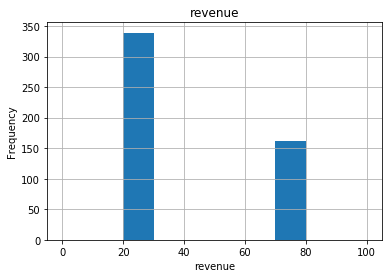

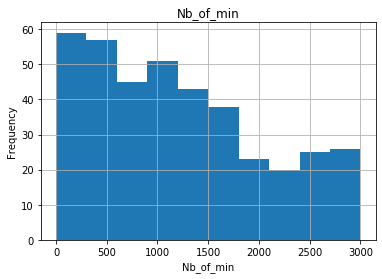

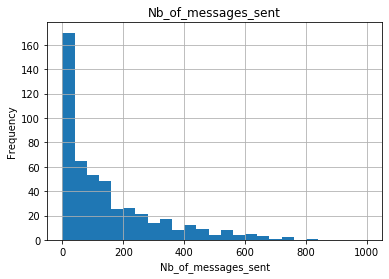

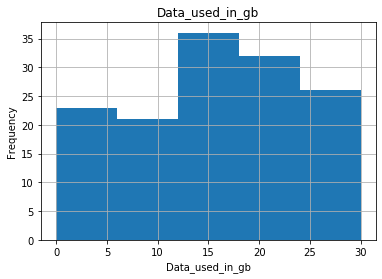

In [48]:
final_merge.hist('revenue', bins=10, range=(0,100))
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.show()

final_merge.hist('Nb_of_min', bins=10, range=(0,3000))
plt.xlabel('Nb_of_min')
plt.ylabel('Frequency')
plt.show()

final_merge.hist('Nb_of_messages_sent', bins=25, range=(0,1000))
plt.xlabel('Nb_of_messages_sent')
plt.ylabel('Frequency')
plt.show()

final_merge.hist('Data_used_in_gb', bins=5, range=(0,30))
plt.xlabel('Data_used_in_gb')
plt.ylabel('Frequency')
plt.show()

From the histograms I can conclude that:
- Most of the revenues are less than 25 dollars. From that I can say that there are  more clients for surf plan than clients of ultimate plan(By comparing the price of monthly charge).
- From "Nb_of_min" histogram, we can conclude that maximum clients used around 1500 minutes.
- From "Nb_of_messages_sent" histogram, we can say that clients are not interested for sending messages. Very few people sent messages.
- Almost all of the clients used more internet.

**Drawing catplot comparing by plan and "Nb_of_min", "Nb_of_messages_sent", "Data_used_in_gb", "revenue":**

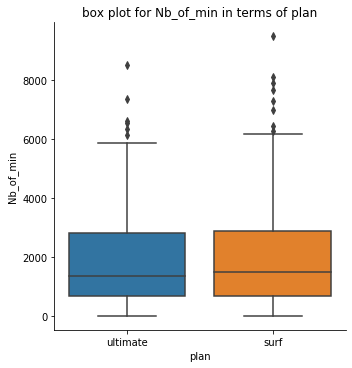

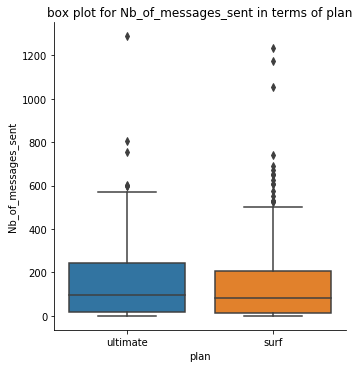

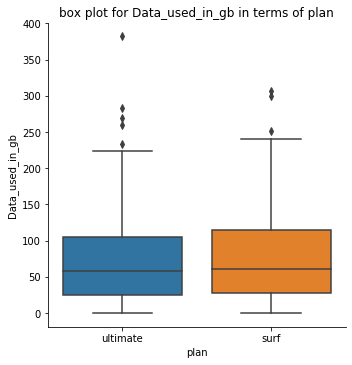

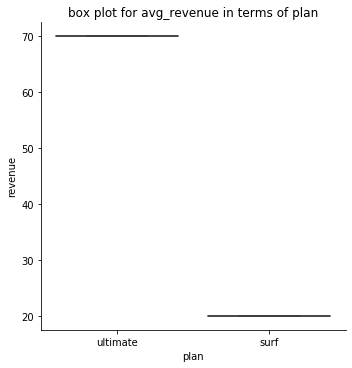

In [49]:
sns.catplot(x="plan", y="Nb_of_min",  kind="box", data=final_merge).set(title='box plot for Nb_of_min in terms of plan')
sns.catplot(x="plan", y="Nb_of_messages_sent",  kind="box", data=final_merge).set(title='box plot for Nb_of_messages_sent in terms of plan')
sns.catplot(x="plan", y="Data_used_in_gb",  kind="box", data=final_merge).set(title='box plot for Data_used_in_gb in terms of plan')
sns.catplot(x="plan", y="revenue",  kind="box", data=final_merge).set(title='box plot for avg_revenue in terms of plan')

From the catplot we can say:
-  When comparing "Nb_of_min" for the surf and ultimate plan users lower limit, 25% percentile and median are same. Only slightly difference for the upper limit. 
-  When comparing "Nb_of_messages_sent" for the surf and ultimate plan users, IQR range is bit higher for the ultimate plan compared to surf plan.
-  For the "Data_used_in_gb", lower limit,medium and 25% percentile are same for both type of clients(little difference for 75% percentile and upper limit).
-  For the "revenue", we can say ultimate plan users paying more revenues compared to the surf plan users.
    

**Determining the "surf" and "ultimate" plan users:**

In [50]:
print("number of total clients:", len(final_merge))
print(final_merge['plan'].value_counts())

number of total clients: 500
surf        339
ultimate    161
Name: plan, dtype: int64


In the telecom operator Megaline has 500 clients in total. Among all of them 339 are surf plan users and 161 are ultimate plan users.

**Dispersion for the "revenue" column:**

In [51]:
Q1 = final_merge['revenue'].quantile(0.25)
Q3 = final_merge['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print("Upper_limit:" , upper_limit.round())
print("Lower_limit:" , lower_limit.round())

Upper_limit: 145.0
Lower_limit: -55.0


The dispersion for the "revenue" is between -55 to 145.

**Determining mean for the "revenue":**

In [52]:
print("Mean for revenue column:", final_merge['revenue'].mean())
print()
print("According to the plan users mean:")
print(final_merge.groupby('plan')['revenue'].mean())

Mean for revenue column: 36.1

According to the plan users mean:
plan
surf        20.0
ultimate    70.0
Name: revenue, dtype: float64


For both plans average revenue is 36.1. Average revenue for the "ultimate" plan users is higher compared to the "surf" plan users.

**Total of average revenue:**

In [53]:
print("Total of average revenue:", final_merge['revenue'].sum())
print()
print("According to users:")
print()
print(final_merge.groupby('plan')['revenue'].sum())

Total of average revenue: 18050.0

According to users:

plan
surf         6780.0
ultimate    11270.0
Name: revenue, dtype: float64


Total of average revenue is 18050.Total for the "Surf" and "ultimate" plan users average revenue is 6780 and 11270 respectively. 

**Determining variance and standard deviation for "revenue":**

In [54]:
variance = np.var(final_merge['revenue'])
print("variance for revenue column:", variance) 
standard_deviation = np.std(final_merge['revenue'])
print ("standard deviation for revenue column:", standard_deviation)

variance for revenue column: 545.7899999999984
standard deviation for revenue column: 23.362148873765836


**Description of the "Nb_of_min", "Nb_of_messages_sent", "Data_used_in_gb",  "revenue" column:**

In [55]:
print("Information regarding Nb_of_min column:")
print(final_merge['Nb_of_min'].describe())
print()
print("Information regarding Nb_of_messages_sent column:")
print(final_merge['Nb_of_messages_sent'].describe())
print()
print("Information regarding Data_used_in_gb column:")
print(final_merge['Data_used_in_gb'].describe())
print()
print("Information regarding revenue column:")
print(final_merge['revenue'].describe())

Information regarding Nb_of_min column:
count     500.000000
mean     1968.694000
std      1717.948036
min         0.000000
25%       658.250000
50%      1452.500000
75%      2855.500000
max      9495.000000
Name: Nb_of_min, dtype: float64

Information regarding Nb_of_messages_sent column:
count     500.000000
mean      152.102000
std       187.988177
min         0.000000
25%        14.000000
50%        87.000000
75%       225.000000
max      1288.000000
Name: Nb_of_messages_sent, dtype: float64

Information regarding Data_used_in_gb column:
count    500.000000
mean      75.576000
std       60.880087
min        0.000000
25%       27.000000
50%       60.000000
75%      111.000000
max      382.000000
Name: Data_used_in_gb, dtype: float64

Information regarding revenue column:
count    500.000000
mean      36.100000
std       23.385546
min       20.000000
25%       20.000000
50%       20.000000
75%       70.000000
max       70.000000
Name: revenue, dtype: float64


-  In the telecom operator Megaline has 500 clients in total. Among all of them 339 are surf plan users and 161 are ultimate plan users.
-  Total of average revenue is 18050.Total for the "Surf" and "ultimate" plan users average revenue is 6780 and 11270 respectively. 
-  variance for revenue column is 545.79 & standard deviation for revenue column is 23.36.
-  The dispersion for the "revenue" is between -55 to 145.

<a id='the_destination4'></a>
# Step 4. Testing hypotheses

**First hypothsis formulation:**

- Null Hypothesis (H_0) : The average revenue from users of Ultimate and Surf calling plans are equal.


- Alternative hypothesis (H_1) : The average revenue from users of Ultimate and Surf calling plans are not equal.

**Comparison of variance for the "ultimate" and "surf" plan:**

In [56]:
variance_01 = np.var(final_merge.query('plan == "surf"')['revenue'])
variance_02 = np.var(final_merge.query('plan == "ultimate"')['revenue'])
 
if variance_01 == variance_02:
    print('both variance are equal')
elif variance_01 != variance_02:
    print('variance are not equal. So the parameter : equal_var = False ')
else:
    print("can not be compared")

both variance are equal


**Applying critical statistical significance level and getting decision regarding null hypothesis:**

In [57]:
alpha = 0.05 
results = st.ttest_ind(final_merge.query('plan == "surf"')['revenue'],final_merge.query('plan == "ultimate"')['revenue'] , equal_var = False )
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0
We reject the null hypothesis


As we are rejecting null hypothesis that means the average revenue from users of Ultimate and Surf calling plans are not equal.

**Finding mean for the "surf" and "ultimate" plan users for "revenue":**

In [58]:
print("Mean for the surf plan users for revenue:", final_merge.query('plan == "surf"')['revenue'].mean())
print()
print("Mean for the ultimate plan users for revenue:" , final_merge.query('plan == "ultimate"')['revenue'].mean())

Mean for the surf plan users for revenue: 20.0

Mean for the ultimate plan users for revenue: 70.0


Mean for the "ultimate"  and "surf" plan users for revenue are not same.That means this follow the alternative hypothesis.

**Second hypothsis formulation:**

- Null Hypothesis (H_0) : The average revenue from users in NY-NJ area is equal to that of the users from other regions.


- Alternative hypothesis (H_1) : The average revenue from users in NY-NJ area is not equal to that of the users from other regions.

**Comparison of variance for the "NY-NJ" residents and "not NY_NJ" residents:**

In [59]:
variance_03 = np.var(final_merge.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'])
variance_04 = np.var(final_merge.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'])

if variance_03 == variance_04:
    print('both variance are equal')
elif variance_03 != variance_04:
    print('variance are not equal. So the parameter : equal_var = False ')
else:
    print("can not be compared")

variance are not equal. So the parameter : equal_var = False 


**Applying critical statistical significance level and getting decision regarding null hypothesis:**

In [60]:
alpha = 0.05
results = st.ttest_ind(final_merge.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'],final_merge.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] , equal_var = False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.11449891680287495
We can't reject the null hypothesis


As we are not rejecting null hypothesis that means the average revenue from users in NY-NJ area is equal to that of the users from other regions..

**Finding mean for the "NY_NJ_residents" and "not_NY_NJ_residents" for "revenue":**

In [61]:
NY_NJ_residents = final_merge.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
not_NY_NJ_residents = final_merge.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

print("Mean for the NY-NJ residents for revenue:" , NY_NJ_residents["revenue"].mean())
print()
print("Mean is not for the NY-NJ residents for revenue:" , not_NY_NJ_residents["revenue"].mean())
print()

Mean for the NY-NJ residents for revenue: 32.5

Mean is not for the NY-NJ residents for revenue: 36.785714285714285



Mean for the "NY-NJ_residents"  and "not_NY_NJ_residents" for revenue are almost same.That means this follow the null hypothesis.


<a id='the_destination5'></a>
# Step 5. Overall Conclusion

- After analysing the project, I can say that "surf" plan users are more than "ultimate" plan users.However "ultimate" plan users bring more revenues compared to "surf" plan users.
- Telecom operator Megaline can focus on "ultimate" plan by adding more benefits so that clients would be more interested for using this plan & company can get more revenues.
- There can be one more plan between "surf" plan & "ultimate" plan by considering monthly charge. So that clients can use their convenient plan & company get extra revenue form the "new" plan.. 